# Instalação de Bibliotecas

In [185]:
!pip install xgboost -q xgboost

# Leitura dos dados

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xg
from math import sqrt
from statistics import mode

In [187]:
df = pd.read_csv('../../train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [188]:
used_cols = []

In [189]:
df_test = pd.read_csv('../../test.csv')
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Funções auxiliares

## Genéricas

In [190]:
def get_X_test(df, used_cols):
    X = df[used_cols].values
    return X

def create_submission(df_test, y_pred):
    submission_df = pd.DataFrame({'Id': df_test['Id'].values, 'SalePrice': y_pred})
    return submission_df

def filter_outliers(df):
    df = df.query("`LotArea` < 100000")
    return df

def check_nulls(cols):
    for col in cols:
        print(f"Percentage of nulls in {col}:")
        print(f"Train: {100*df_train[col].isna().sum()/ df_train.shape[0]:.2f}%")
        print(f"Val: {100*df_val[col].isna().sum()/ df_val.shape[0]:.2f}%")
        print(f"Test: {100*df_test[col].isna().sum()/ df_test.shape[0]:.2f}%\n")

def encode_qual(x):
    mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1 }
    
    if str(x)[0] == 'n':
        return 3 
    return mapping[x]

def encode_finish(x):
    mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
    if str.lower(str(x)[0]) == 'n':
        return 0
    return mapping[x]
        
        
def apply_df_changes(col, func):
    for df in df_train, df_val, df_test:
        df[col] = df[col].apply(func)
        
def show_feature_importances(model):
    feature_importances = xgb_r.feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]

    print("Feature Importance from XGBoost:")
    for i in sorted_indices:
        print(f"{df_train[used_cols].columns[i]}: {feature_importances[i]:.4f}")


## Plots

In [191]:
def plot_residuals(y_pred, y_test):
    residuals = y_pred - y_test
    
    sns.scatterplot(x=y_test.flatten(), y=residuals.flatten())
    plt.axhline(0, linestyle='--',color='red')
    plt.xlabel("Actual House Prices")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()   

def scatter(col_1, col_2):    
    plt.figure(figsize=(7, 5))
    plt.title(f"{col_1} x {col_2}")
    sns.scatterplot(data=df_train, x=col_1, y=col_2)

    plt.show()
    
def plot_histograms(df, columns, subplot_shape):
    rows, cols = subplot_shape
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  
    if len(columns) > 1:
        axes = axes.flatten()

    for i, col in enumerate(columns):
        bins = len(df[col].unique())
        if bins < 20:
            sns.histplot(df[col], ax=axes[i], bins=bins)
        else:
            sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_avg_sales_price_by_cat(df, columns, subplot_shape):
    rows, cols = subplot_shape
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))  
    if len(columns) > 1:
        axes = axes.flatten()
    
    default_blue = sns.color_palette()[0]

    for i, col in enumerate(columns):
        bins = len(df[col].unique())
        sns.barplot(x=col, y='SalePrice', data=df, ax=axes[i], estimator=np.mean, errorbar=None, color=default_blue)
        axes[i].set_title(f"Avg Sale Price by {col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

# Split (Treino / Validação)

In [192]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

print(f"df_train shape: {df_train.shape}")
print(f"df_val shape: {df_val.shape}")

df_train shape: (1168, 81)
df_val shape: (292, 81)


# Análise Exploratória de Dados

## Lot Area

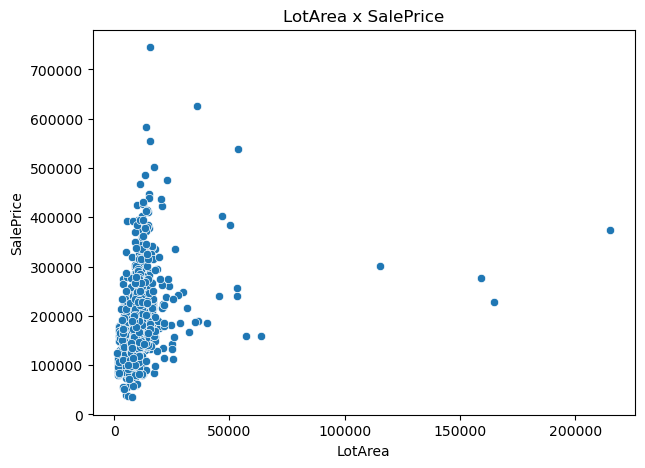

In [193]:
scatter('LotArea', 'SalePrice')

In [194]:
if 'LotArea' not in used_cols:
    used_cols.append('LotArea')

## Overall Quality and Condition

In [195]:
overall_cols = ['OverallQual', 'OverallCond']

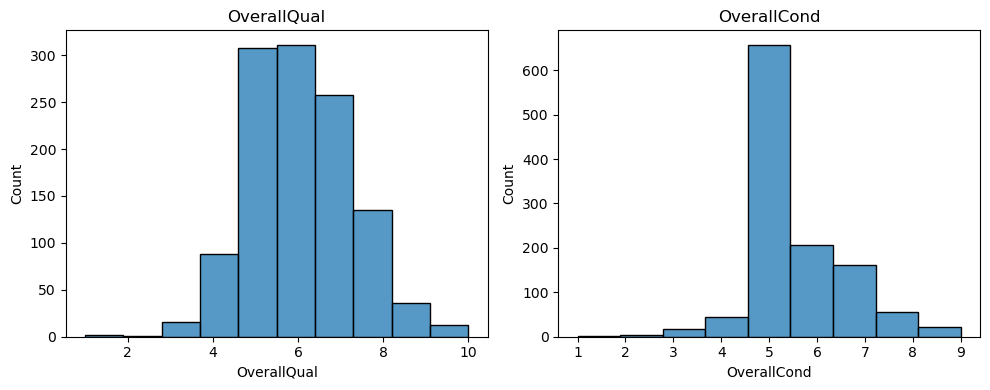

In [196]:
plot_histograms(df_train, overall_cols, (1,2))

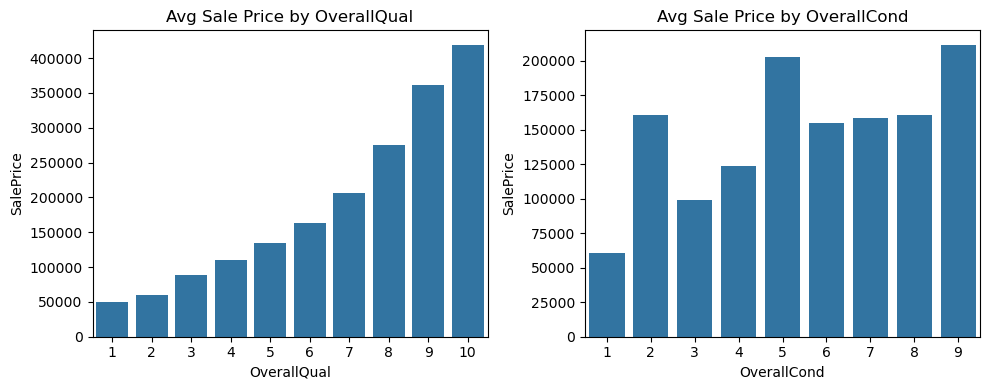

In [197]:
plot_avg_sales_price_by_cat(df_train, overall_cols, (1,2))

In [198]:
for col in overall_cols:
    if col not in used_cols:
        used_cols.append(col)

# PoolQC, PoolArea e Fence

In [199]:
new_cols = ['PoolArea', 'PoolQC', 'Fence']
check_nulls(new_cols)

Percentage of nulls in PoolArea:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in PoolQC:
Train: 99.49%
Val: 99.66%
Test: 99.79%

Percentage of nulls in Fence:
Train: 80.05%
Val: 83.56%
Test: 80.12%



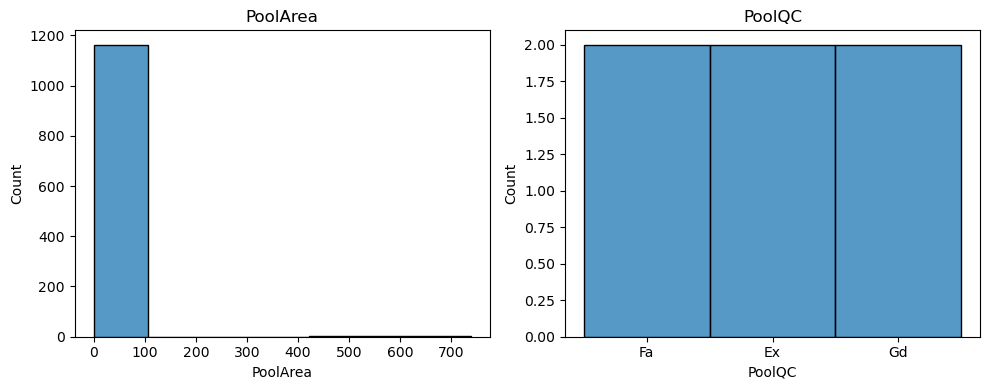

In [200]:
pool_cols = ['PoolArea', 'PoolQC']
plot_histograms(df_train, pool_cols, (1,2))

In [201]:
df_train.query("`PoolArea` > 0").shape[0]

6

# Kitchen

In [202]:
kitchen_cols =  ['KitchenAbvGr','KitchenQual']
check_nulls(kitchen_cols)

Percentage of nulls in KitchenAbvGr:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in KitchenQual:
Train: 0.00%
Val: 0.00%
Test: 0.07%



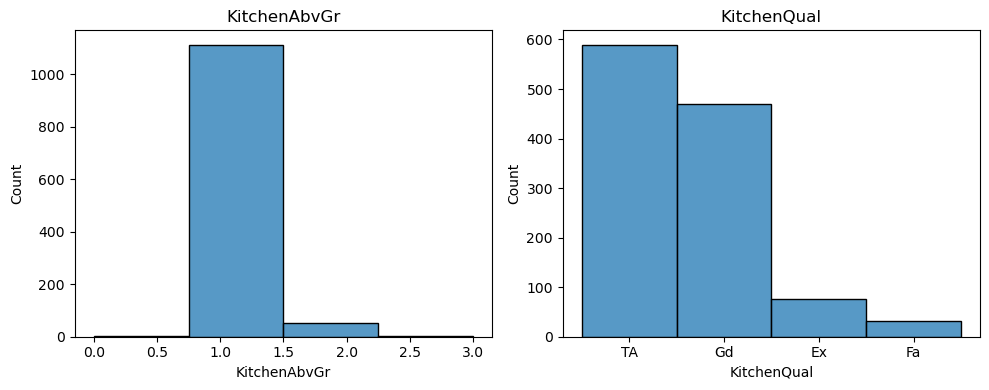

In [203]:
plot_histograms(df_train, kitchen_cols, (1,2))

In [204]:
kitchen_cols = ['KitchenAbvGr', 'KitchenQual']
for col in kitchen_cols:
    if col not in used_cols:
        used_cols.append(col)

In [205]:
apply_df_changes('KitchenQual', encode_qual)

In [206]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual
254,8400,5,6,1,3
1066,7837,6,7,1,3
638,8777,5,7,1,3
799,7200,5,7,1,4
380,5000,5,6,1,4
303,9800,5,7,1,3
86,11911,6,5,1,4
1385,5436,4,8,1,4
265,12090,6,6,1,4
793,9158,8,5,1,4


## BedroomAbvGr e TotRmsAbvGrd

In [207]:
room_cols = ['BedroomAbvGr', 'TotRmsAbvGrd']
check_nulls(room_cols)

Percentage of nulls in BedroomAbvGr:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in TotRmsAbvGrd:
Train: 0.00%
Val: 0.00%
Test: 0.00%



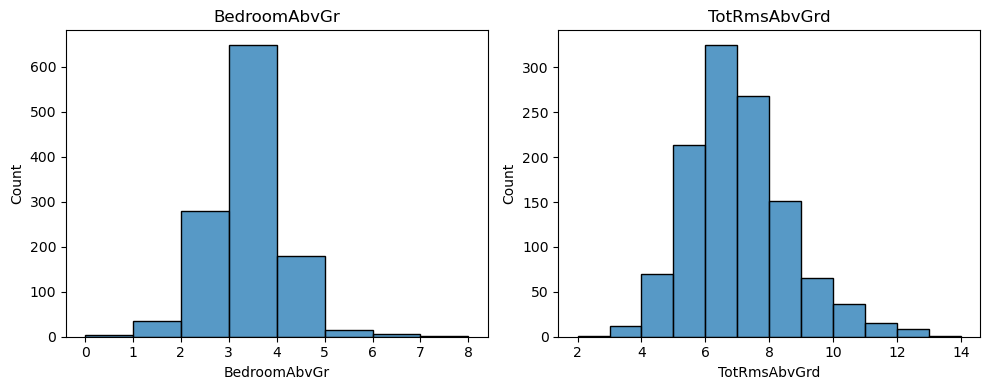

In [208]:
plot_histograms(df_train, room_cols, (1,2))

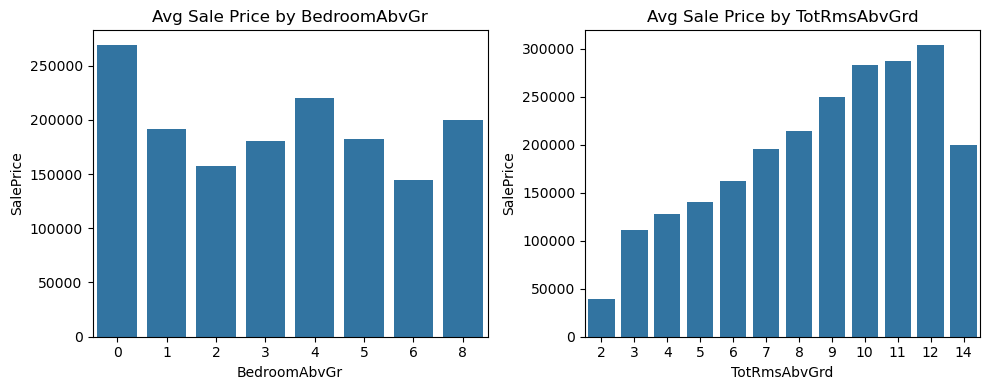

In [209]:
plot_avg_sales_price_by_cat(df_train, room_cols, (1,2))

In [210]:
for df in df_train, df_val, df_test:
    df['OtherRoomsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

In [211]:
used_cols.append('BedroomAbvGr')

# GrLivArea, LowQualFinSF, 1stFlrSF e 2ndFlrSF

In [212]:
area_cols = ['GrLivArea', 'LowQualFinSF', '1stFlrSF', '2ndFlrSF']
check_nulls(area_cols)

Percentage of nulls in GrLivArea:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in LowQualFinSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in 1stFlrSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in 2ndFlrSF:
Train: 0.00%
Val: 0.00%
Test: 0.00%



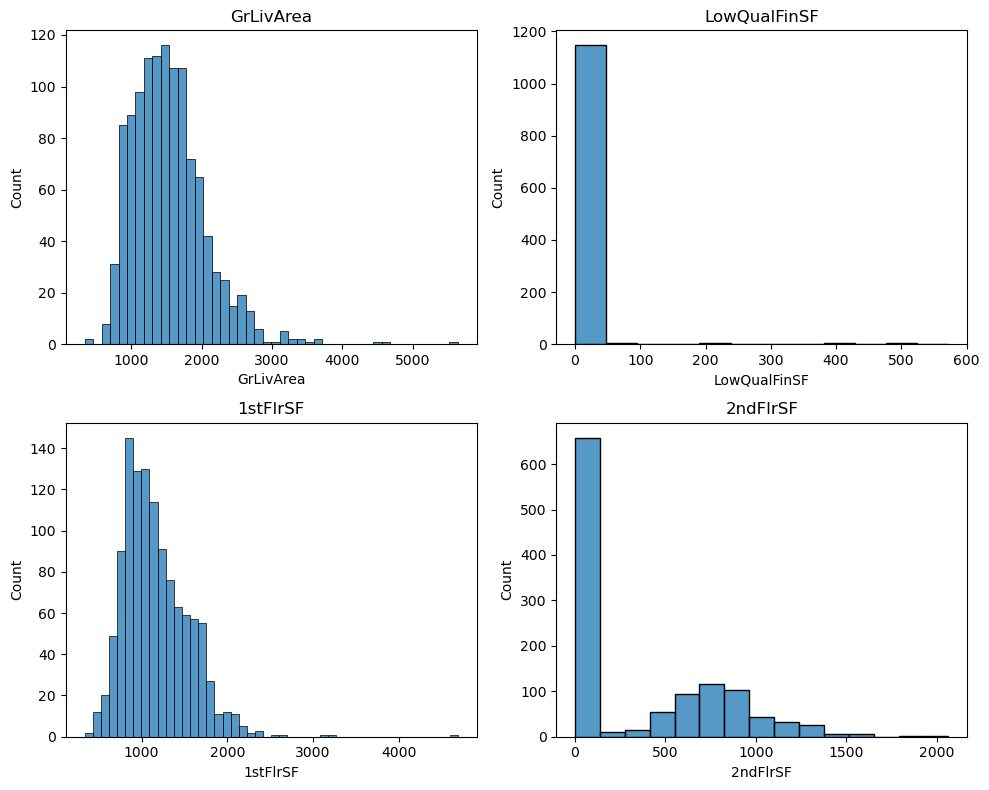

In [213]:
plot_histograms(df_train, area_cols, (2, 2))

In [214]:
area_used_cols = ['1stFlrSF', '2ndFlrSF']

for col in area_used_cols:
    if col not in used_cols:
        used_cols.append(col)

In [215]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual,BedroomAbvGr,1stFlrSF,2ndFlrSF
254,8400,5,6,1,3,3,1314,0
1066,7837,6,7,1,3,3,799,772
638,8777,5,7,1,3,2,796,0
799,7200,5,7,1,4,3,981,787
380,5000,5,6,1,4,3,1026,665
303,9800,5,7,1,3,3,894,0
86,11911,6,5,1,4,3,684,876
1385,5436,4,8,1,4,3,796,358
265,12090,6,6,1,4,3,1422,0
793,9158,8,5,1,4,3,1496,0


## BsmtFullBath, BsmtHalfBath, HalfBath e FullBath

In [216]:
bath_cols = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath']

In [217]:
check_nulls(bath_cols)

Percentage of nulls in BsmtFullBath:
Train: 0.00%
Val: 0.00%
Test: 0.14%

Percentage of nulls in BsmtHalfBath:
Train: 0.00%
Val: 0.00%
Test: 0.14%

Percentage of nulls in HalfBath:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in FullBath:
Train: 0.00%
Val: 0.00%
Test: 0.00%



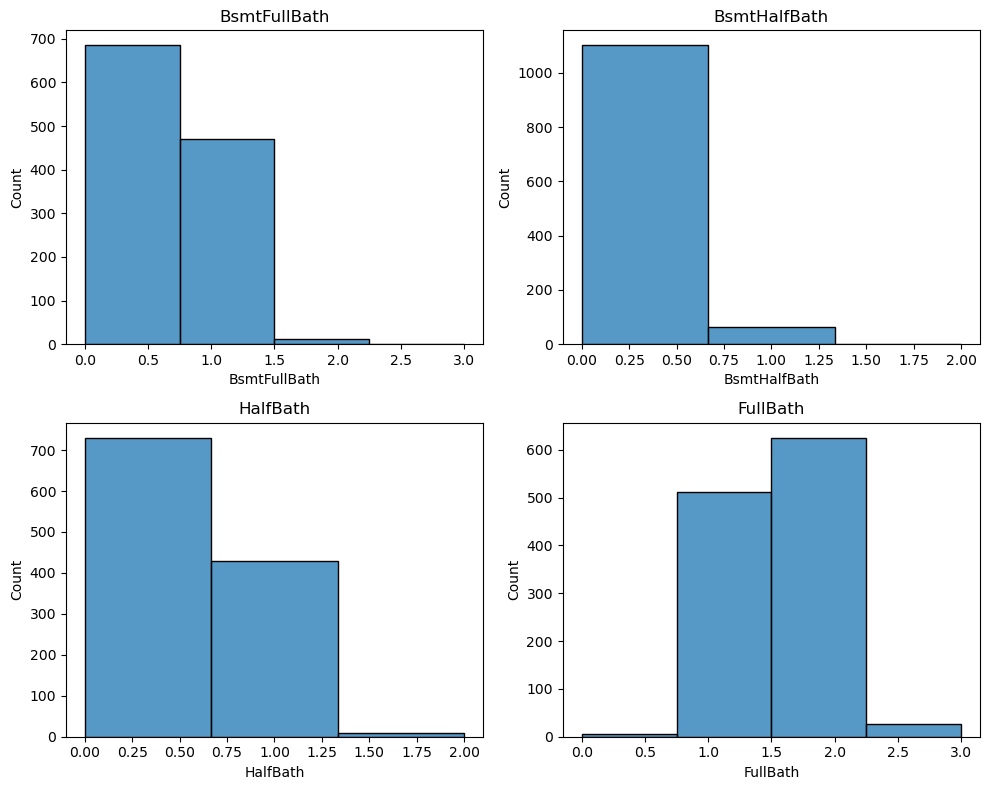

In [218]:
plot_histograms(df_train, bath_cols,(2,2))

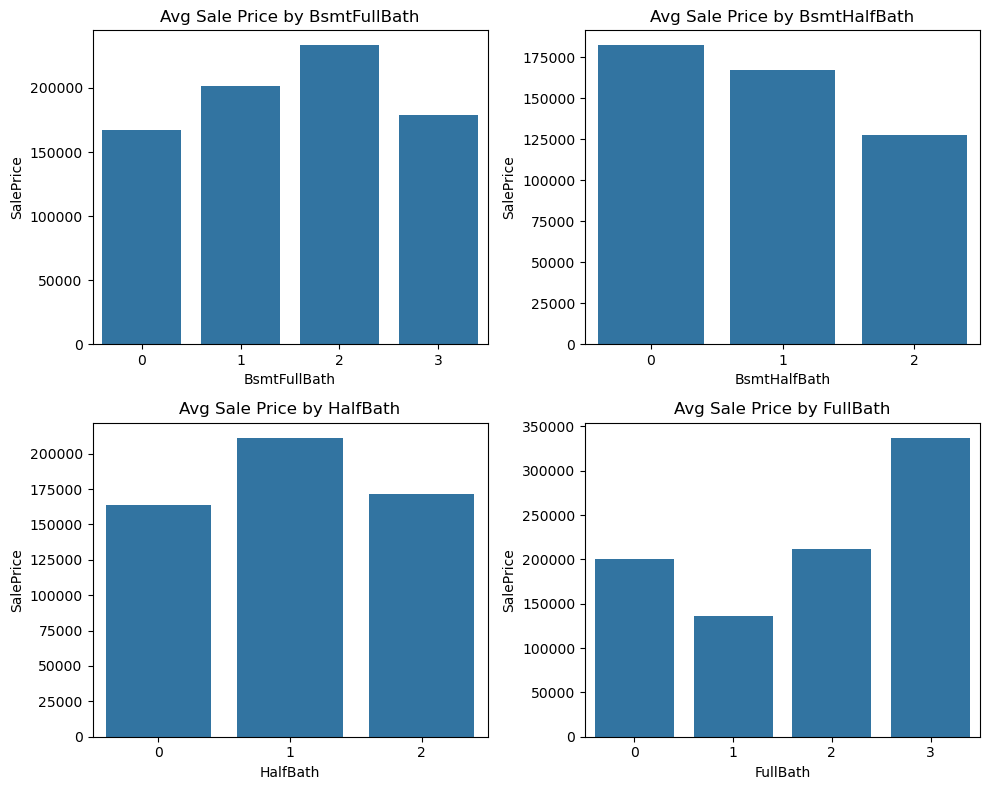

In [219]:
plot_avg_sales_price_by_cat(df_train, bath_cols,(2,2))

In [220]:
for col in ['HalfBath', 'FullBath', 'BsmtFullBath']:
    used_cols.append(col)

## Fireplaces e FireplaceQu

In [221]:
fireplace_cols = ['Fireplaces', 'FireplaceQu']

In [222]:
check_nulls(fireplace_cols)

Percentage of nulls in Fireplaces:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in FireplaceQu:
Train: 46.83%
Val: 48.97%
Test: 50.03%



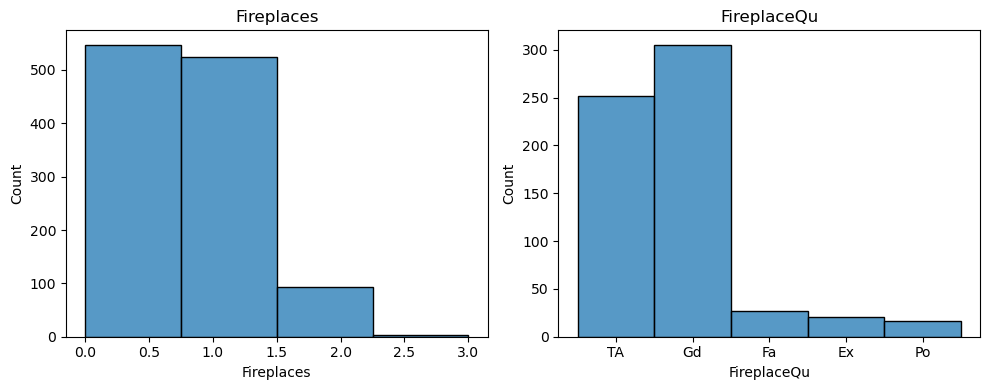

In [223]:
plot_histograms(df_train, fireplace_cols,(1,2))

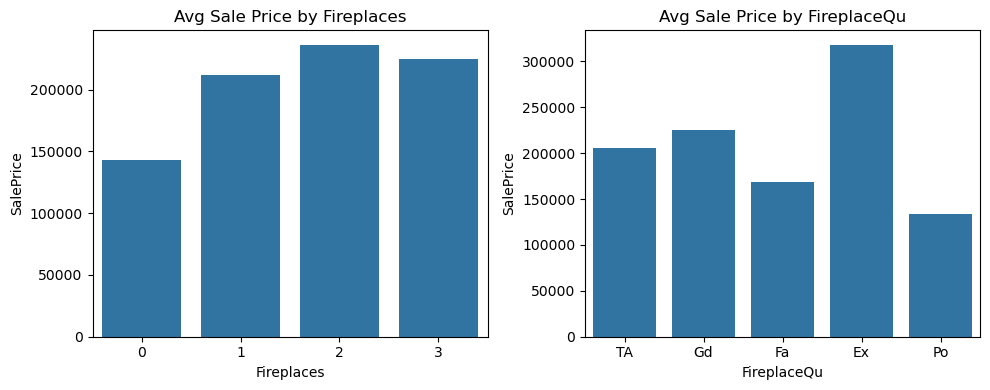

In [224]:
plot_avg_sales_price_by_cat(df_train, fireplace_cols,(1,2))

In [225]:
used_cols.append('Fireplaces')

## YrSold e MoSold

In [226]:
sold_cols = ['YrSold', 'MoSold']

In [227]:
check_nulls(sold_cols)

Percentage of nulls in YrSold:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in MoSold:
Train: 0.00%
Val: 0.00%
Test: 0.00%



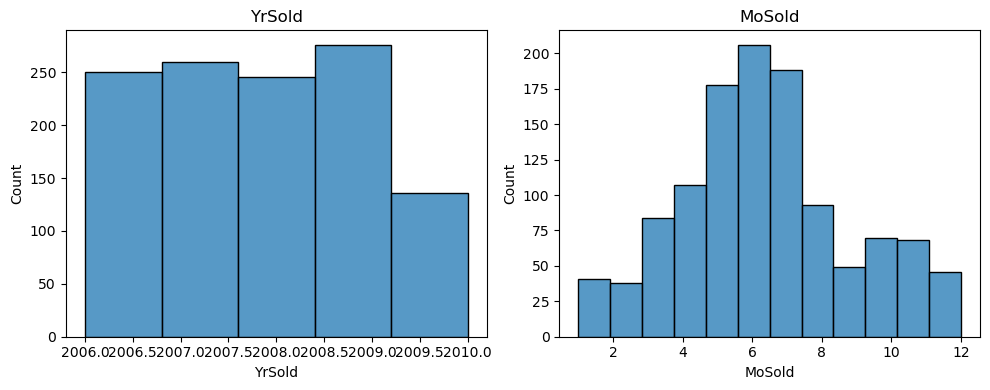

In [228]:
plot_histograms(df_train, sold_cols,(1,2))

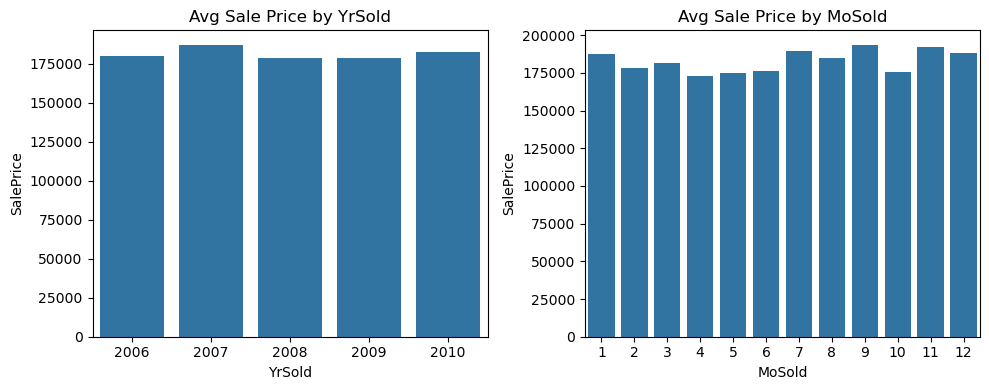

In [229]:
plot_avg_sales_price_by_cat(df_train, sold_cols,(1,2))

## MiscFeature e MiscVal

In [230]:
misc_cols = ['MiscFeature', 'MiscVal']
check_nulls(misc_cols)

Percentage of nulls in MiscFeature:
Train: 96.06%
Val: 97.26%
Test: 96.50%

Percentage of nulls in MiscVal:
Train: 0.00%
Val: 0.00%
Test: 0.00%



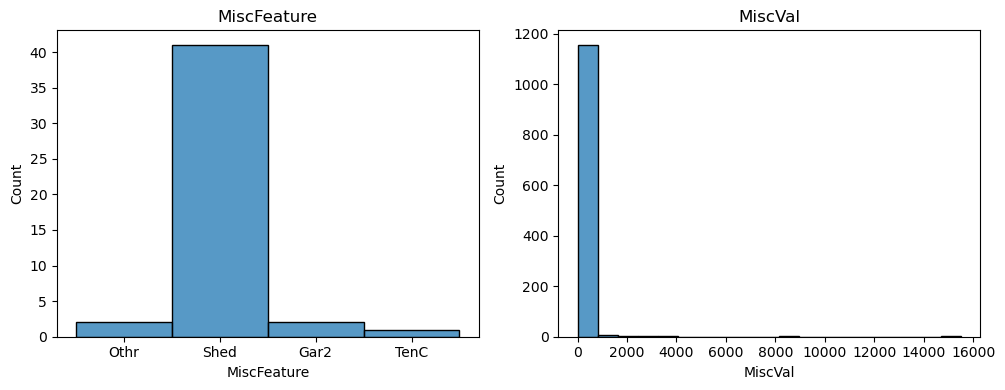

In [231]:
plot_histograms(df_train, misc_cols,(1,2))

## Garage

In [232]:
garage_cols = ['GarageCars','GarageArea','GarageQual','GarageCond', 'GarageFinish', 'GarageYrBlt']
check_nulls(garage_cols)

Percentage of nulls in GarageCars:
Train: 0.00%
Val: 0.00%
Test: 0.07%

Percentage of nulls in GarageArea:
Train: 0.00%
Val: 0.00%
Test: 0.07%

Percentage of nulls in GarageQual:
Train: 5.48%
Val: 5.82%
Test: 5.35%

Percentage of nulls in GarageCond:
Train: 5.48%
Val: 5.82%
Test: 5.35%

Percentage of nulls in GarageFinish:
Train: 5.48%
Val: 5.82%
Test: 5.35%

Percentage of nulls in GarageYrBlt:
Train: 5.48%
Val: 5.82%
Test: 5.35%



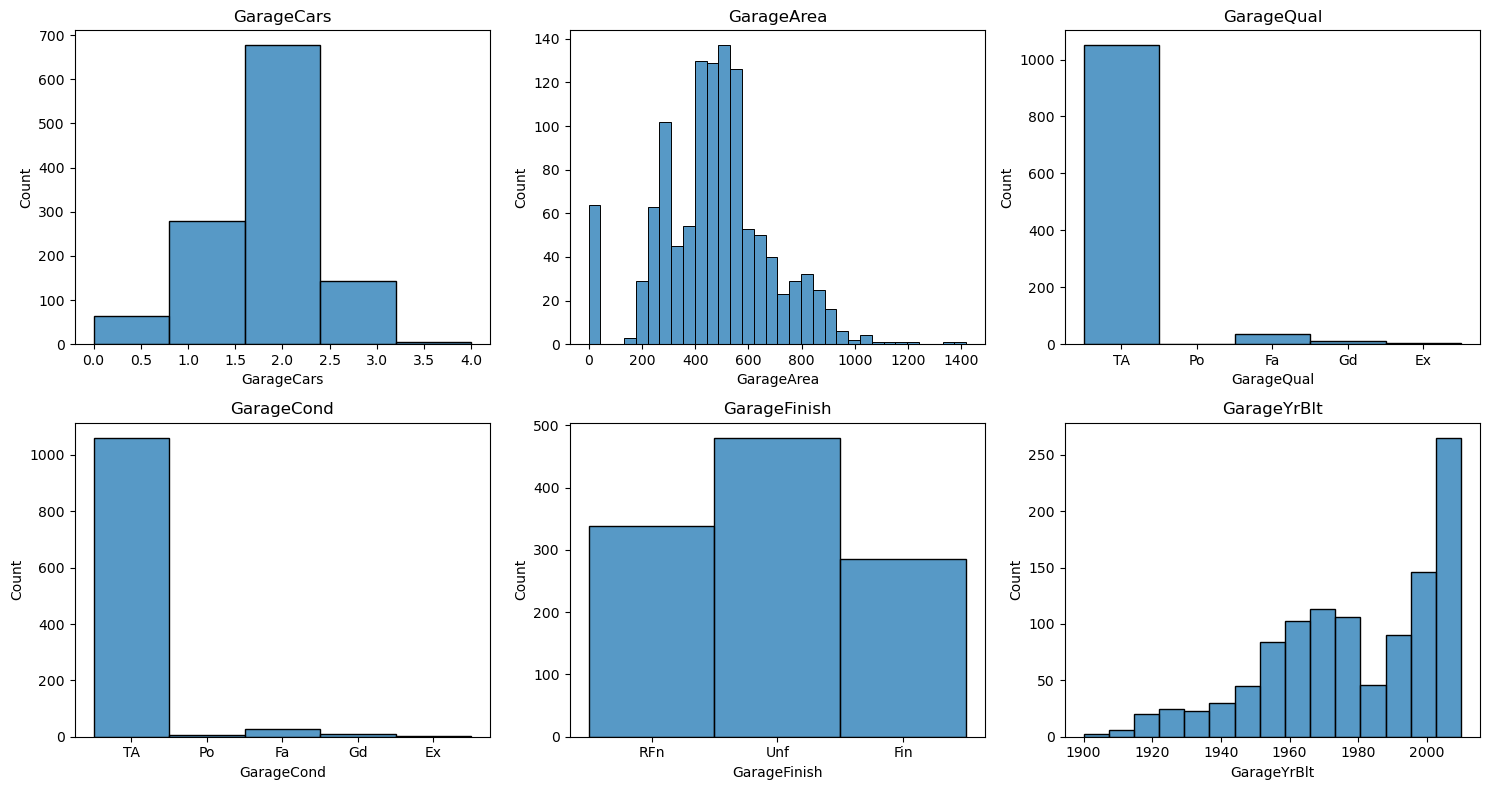

In [233]:
plot_histograms(df_train, garage_cols, (2,3))

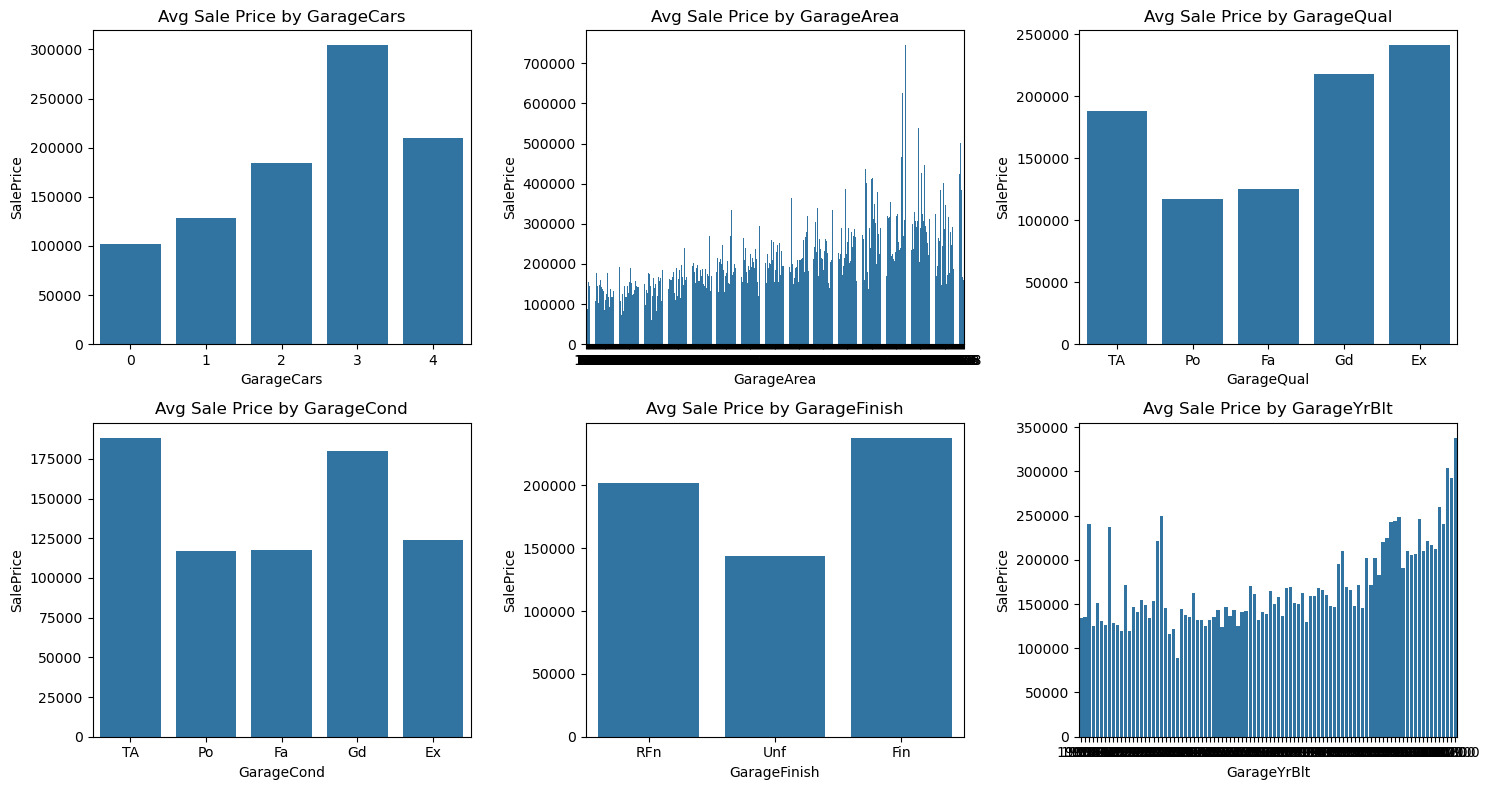

In [234]:
plot_avg_sales_price_by_cat(df_train, garage_cols, (2,3))

In [235]:
np.corrcoef(df_train['GarageCars'], df_train['GarageArea'])

array([[1.        , 0.88254951],
       [0.88254951, 1.        ]])

In [244]:
df_test['GarageCars'].fillna(2, inplace=True)

In [245]:
used_cols.append('GarageCars')

## CentralAir, Electrical and Heating

In [252]:
infra_cols = ['CentralAir', 'Electrical', 'Heating', 'HeatingQC']
check_nulls(infra_cols)

Percentage of nulls in CentralAir:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in Electrical:
Train: 0.09%
Val: 0.00%
Test: 0.00%

Percentage of nulls in Heating:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in HeatingQC:
Train: 0.00%
Val: 0.00%
Test: 0.00%



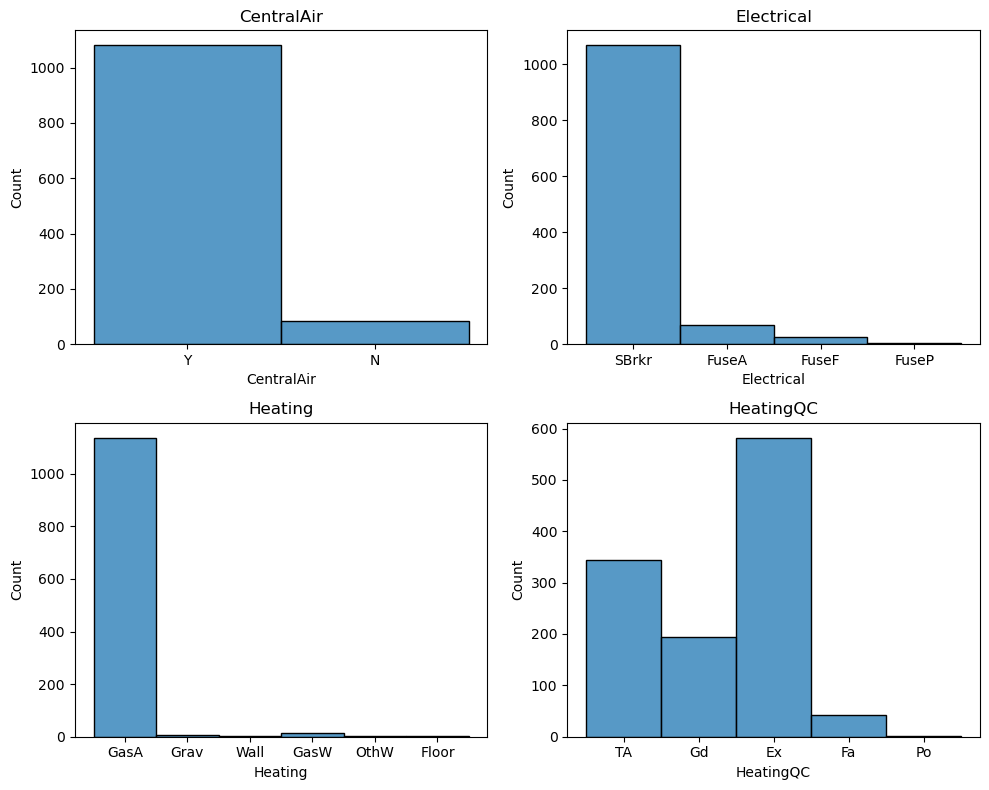

In [254]:
plot_histograms(df_train, infra_cols, (2,2))

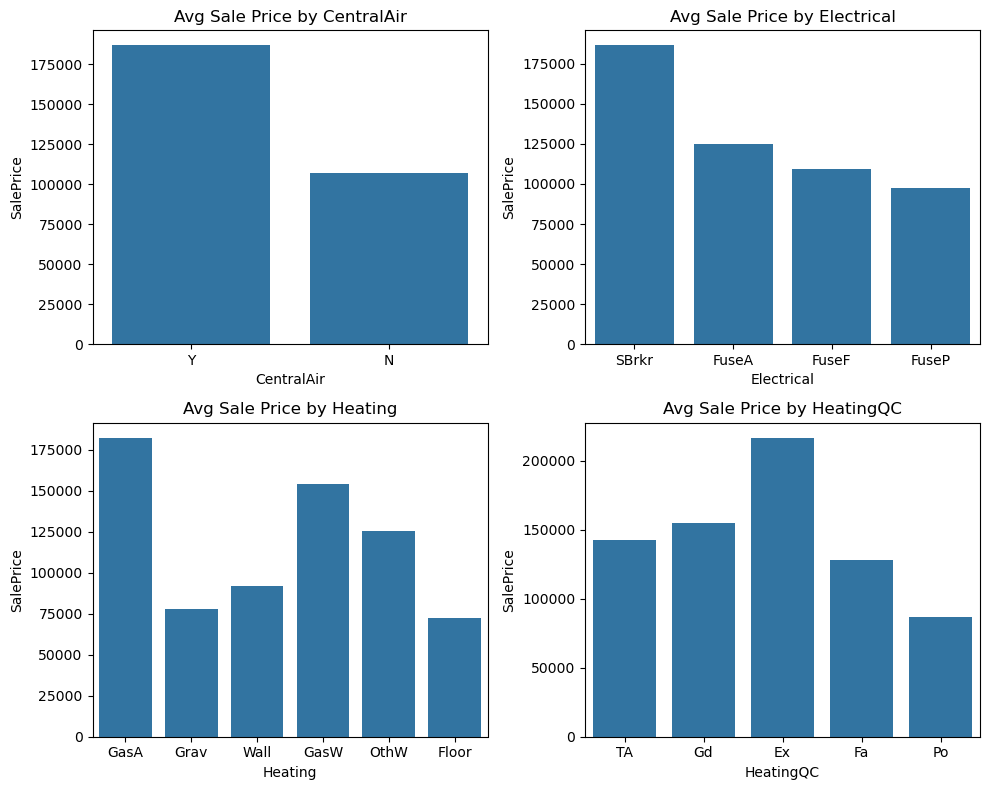

In [255]:
plot_avg_sales_price_by_cat(df_train, infra_cols, (2,2))

In [256]:
used_cols.append('HeatingQC')

In [261]:
apply_df_changes('HeatingQC', encode_qual)

## Masonry

In [268]:
masonry_cols = ['MasVnrArea','MasVnrType']
check_nulls(masonry_cols)

Percentage of nulls in MasVnrArea:
Train: 0.52%
Val: 0.68%
Test: 1.03%

Percentage of nulls in MasVnrType:
Train: 58.51%
Val: 64.73%
Test: 61.27%



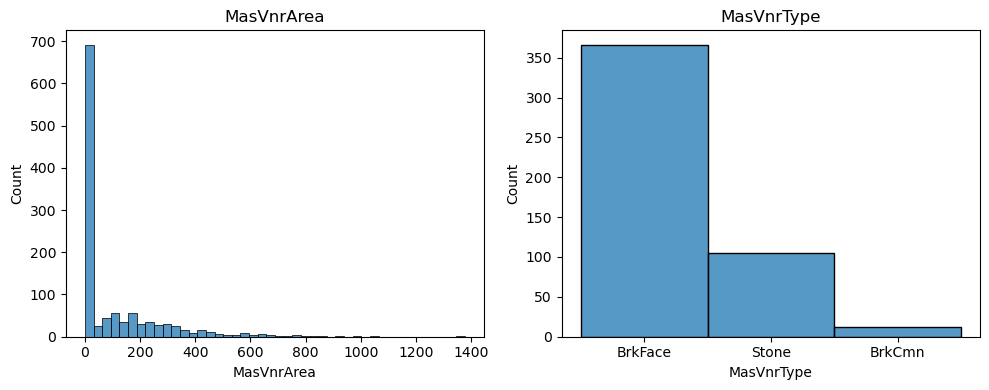

In [269]:
plot_histograms(df_train, masonry_cols, (1,2))

## Lot

In [270]:
lot_cols = ['LotFrontage', 'LotShape']
check_nulls(lot_cols)

Percentage of nulls in LotFrontage:
Train: 18.38%
Val: 14.38%
Test: 15.56%

Percentage of nulls in LotShape:
Train: 0.00%
Val: 0.00%
Test: 0.00%



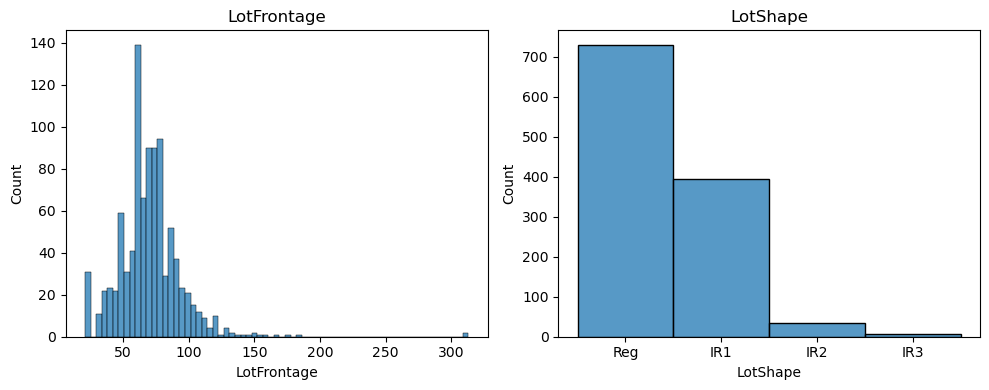

In [271]:
plot_histograms(df_train, lot_cols, (1,2))

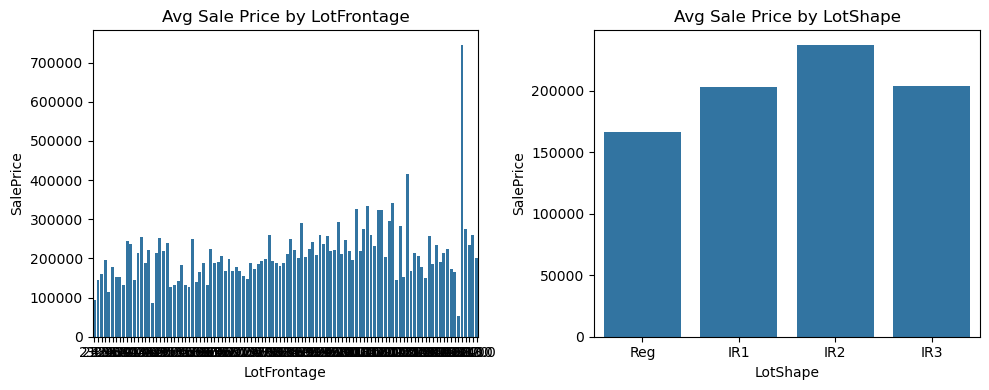

In [272]:
plot_avg_sales_price_by_cat(df_train, lot_cols, (1,2))

In [274]:
lot_ft_mean = np.mean(df_train['LotFrontage'])
for df in [df_train, df_val, df_test]:
    df['LotFrontage'].fillna(lot_ft_mean,inplace=True)

In [276]:
def encode_shape(x):
    if x == 'Reg':
        return 1
    return 0

apply_df_changes('LotShape', encode_shape)

In [278]:
used_cols.append('LotFrontage')
used_cols.append('LotShape')

## Street e Alley

In [287]:
street_cols = ['Street', 'Alley']
check_nulls(street_cols)

Percentage of nulls in Street:
Train: 0.00%
Val: 0.00%
Test: 0.00%

Percentage of nulls in Alley:
Train: 93.64%
Val: 94.18%
Test: 92.67%



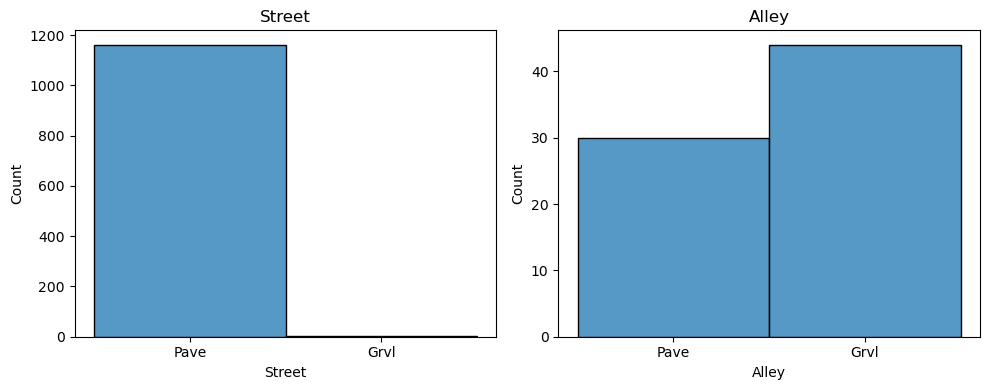

In [288]:
plot_histograms(df_train, street_cols, (1,2))

# Outliers

In [279]:
df_train = filter_outliers(df_train)

In [280]:
df_train[used_cols].isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
KitchenAbvGr    0
KitchenQual     0
BedroomAbvGr    0
1stFlrSF        0
2ndFlrSF        0
HalfBath        0
FullBath        0
BsmtFullBath    0
Fireplaces      0
GarageCars      0
HeatingQC       0
LotFrontage     0
LotShape        0
dtype: int64

# Treino

In [318]:
df_train[used_cols].head(10)

,LotArea,OverallQual,OverallCond,KitchenAbvGr,KitchenQual,BedroomAbvGr,1stFlrSF,2ndFlrSF,HalfBath,FullBath,BsmtFullBath,Fireplaces,GarageCars,HeatingQC,LotFrontage,LotShape
254,8400,5,6,1,3,3,1314,0,0,1,1,0,1,3,70.0,1
1066,7837,6,7,1,3,3,799,772,1,2,0,1,2,4,59.0,0
638,8777,5,7,1,3,2,796,0,0,1,0,0,0,4,67.0,1
799,7200,5,7,1,4,3,981,787,1,1,1,2,1,5,60.0,1
380,5000,5,6,1,4,3,1026,665,0,2,0,1,1,3,50.0,1
303,9800,5,7,1,3,3,894,0,0,1,1,0,2,3,70.0,1
86,11911,6,5,1,4,3,684,876,1,2,0,1,2,5,122.0,0
1385,5436,4,8,1,4,3,796,358,0,1,1,0,1,4,40.0,1
265,12090,6,6,1,4,3,1422,0,0,2,0,1,2,3,78.0,0
793,9158,8,5,1,4,3,1496,0,0,2,0,0,2,5,76.0,1


In [319]:
X_train = df_train[used_cols].values
y_train = df_train["SalePrice"].values


X_val = df_val[used_cols].values
y_val = df_val["SalePrice"].values

In [330]:
xgb_r = xg.XGBRegressor(n_estimators=100, seed=42,max_depth=3).fit(X_train, y_train)

# Feature Selection

In [331]:
show_feature_importances(xgb_r)

Feature Importance from XGBoost:
OverallQual: 0.4586
GarageCars: 0.2205
KitchenQual: 0.0830
FullBath: 0.0406
2ndFlrSF: 0.0363
1stFlrSF: 0.0280
Fireplaces: 0.0268
HalfBath: 0.0212
BsmtFullBath: 0.0196
LotArea: 0.0171
HeatingQC: 0.0113
OverallCond: 0.0087
KitchenAbvGr: 0.0084
BedroomAbvGr: 0.0082
LotShape: 0.0067
LotFrontage: 0.0051


# Validação

In [332]:
y_pred_val = xgb_r.predict(X_val)

In [333]:
rms = sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE is {rms:.2f}")

RMSE is 28435.68


# Plot Residual

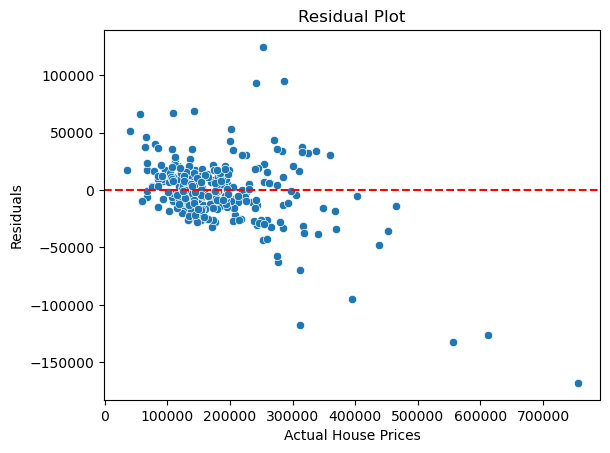

In [334]:
plot_residuals(y_pred_val, y_val)

In [335]:
X_test = get_X_test(df_test, used_cols)
y_pred_test = xgb_r.predict(X_test)

# Submissão

In [336]:
df = create_submission(df_test, y_pred_test)
df.to_csv('submission.csv',index=False)
df.head(10)

,Id,SalePrice
0,1461,114341.500000
1,1462,184099.031250
2,1463,160681.359375
3,1464,176066.578125
4,1465,193592.828125
5,1466,196028.453125
6,1467,175864.375000
7,1468,162678.265625
8,1469,191995.359375
9,1470,120129.304688


# Pontos-chave

- Analisamos variáveis ligadas a miscelâneas, garagem, infraestrutura geral da casa, Alvenaria, lots e Rua
- Melhoramos o nosso modelo de XGBoost, aumentando o número de estimadores e reduzindo a profundidade máxima da árvore
- Primeiro envio: 0.15860
- Segundo envio: 0.15218